In [13]:
# Dependencies
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import requests
import json
import gmaps

# Import API key
from config import g_key

# Configure gmaps
gmaps.configure(api_key=g_key)

In [14]:
file="../Resource/Shark Sightings (clean).csv"
sighting_df= pd.read_csv(file)
sighting_df

,Unnamed: 0,Data ID,Sighting Date,Date,Year,Month,Species,Longitude,Latitude,Location
0,0,63732,2021-07-20T16:47:53,2021-07-20,2021,7,unknown sp.,122.23100,-17.97390,Broome
1,1,63730,2021-07-19T13:34:57,2021-07-19,2021,7,unknown sp.,115.52200,-32.02490,"Salmon Point, Rottnest Island"
2,2,63731,2021-07-19T12:30:37,2021-07-19,2021,7,white,115.50800,-32.01740,"Salmon Bay, Rottnest Island"
3,3,63729,2021-07-19T11:54:35,2021-07-19,2021,7,bull,115.73500,-32.05530,"Swan River, Perth Metro"
4,4,63727,2021-07-18T12:30:42,2021-07-18,2021,7,whale carcass,113.79000,-23.09480,"Mauds Landing Beach, near Coral Bay"
...,...,...,...,...,...,...,...,...,...,...
17302,17302,54674,2014-10-14T03:40:00,2014-10-14,2014,10,white,115.04110,-33.54306,"Bunker Bay, near Dunsborough"
17303,17303,54675,2014-10-14T02:08:00,2014-10-14,2014,10,unknown sp.,115.02817,-33.63339,"Yallingup Beach, Yallingup"
17304,17304,54676,2014-10-13T03:55:00,2014-10-13,2014,10,white,115.10530,-33.60111,"Dunsborough Boat Ramp, Dunsborough"
17305,17305,46307,2014-10-13T02:28:00,2014-10-13,2014,10,tiger,115.64283,-32.14411,Garden Island (north end)


In [15]:
# extract count of shark sighting year on year to be used for bar chart
year_sight=pd.DataFrame(sighting_df.loc[(sighting_df["Year"]>2015)&(sighting_df["Year"]<2021)]['Year'].value_counts())
year_sight=year_sight.rename(columns={"Year":"Shark Sightings Counts"})
year_sight=year_sight.sort_index()

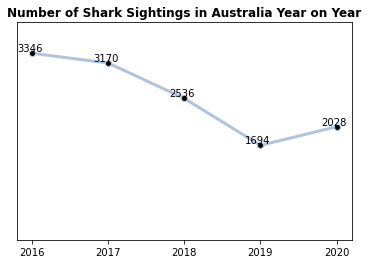

In [30]:
#create bar chart to visualize number of shark sightings year on year across Australia
plt.plot(year_sight.index, year_sight['Shark Sightings Counts'],color="lightsteelblue", linewidth=3, marker='o', markerfacecolor='black')
plt.title("Number of Shark Sightings in Australia Year on Year", fontweight='bold')
plt.ylim(0, 3900)

for index, value in enumerate(year_sight['Shark Sightings Counts']):
    plt.text(year_sight['Shark Sightings Counts'].index[index] - 0.2, value + 35, str(value))

plt.xticks([2016, 2017, 2018, 2019, 2020])
plt.yticks([])

plt.savefig("output/shark sightings yoy.png")


In [17]:
#update the df with a region group (i.e northern region, metro, southern region)

for x in range(len(sighting_df)):
    # northern region above latitude -31.5471024260016
    if sighting_df.loc[x,'Latitude'] > -31.5471024260016:
        #print("North")
        sighting_df.loc[x, 'region'] = "Northern"
    # metro region above latitude -32.6343558722623
    elif sighting_df.loc[x,'Latitude'] > -32.6343558722623:
        #print("Metro")
        sighting_df.loc[x, 'region'] = "Metro"
    # southern region below metro
    else:
        sighting_df.loc[x, 'region'] = "Southern"

sighting_df.head()


,Unnamed: 0,Data ID,Sighting Date,Date,Year,Month,Species,Longitude,Latitude,Location,region
0,0,63732,2021-07-20T16:47:53,2021-07-20,2021,7,unknown sp.,122.231,-17.9739,Broome,Northern
1,1,63730,2021-07-19T13:34:57,2021-07-19,2021,7,unknown sp.,115.522,-32.0249,"Salmon Point, Rottnest Island",Metro
2,2,63731,2021-07-19T12:30:37,2021-07-19,2021,7,white,115.508,-32.0174,"Salmon Bay, Rottnest Island",Metro
3,3,63729,2021-07-19T11:54:35,2021-07-19,2021,7,bull,115.735,-32.0553,"Swan River, Perth Metro",Metro
4,4,63727,2021-07-18T12:30:42,2021-07-18,2021,7,whale carcass,113.790,-23.0948,"Mauds Landing Beach, near Coral Bay",Northern


In [18]:
region_df=sighting_df.loc[(sighting_df["Year"]>2015)&(sighting_df["Year"]<2021)]

result=region_df.groupby("Year")["region"].value_counts()
result


Year  region  
2016  Metro       2634
      Southern     669
      Northern      43
2017  Metro       2177
      Southern     948
      Northern      45
2018  Metro       1242
      Southern    1234
      Northern      60
2019  Southern     967
      Metro        675
      Northern      52
2020  Southern    1172
      Metro        788
      Northern      68
Name: region, dtype: int64

In [19]:
bar_result=result.unstack()

<function matplotlib.pyplot.show(*args, **kw)>

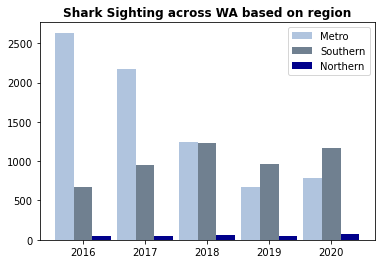

In [20]:
w = 0.3
x= bar_result.index
Metro=bar_result["Metro"]
Southern=bar_result["Southern"]
Northern=bar_result["Northern"]

bar1=np.arange(len(x))
bar2=[i+w for i in bar1]
bar3=[i+w for i in bar2]

plt.bar(bar1,Metro,w,label="Metro", color="lightsteelblue")
plt.bar(bar2,Southern,w,label="Southern",color="slategray")
plt.bar(bar3,Northern,w,label="Northern", color="darkblue")
plt.xticks(bar1+w,[2016, 2017, 2018, 2019, 2020])
plt.legend(loc='best')
plt.title('Shark Sighting across WA based on region',fontweight='bold')
plt.savefig("output/shark sightings by region.png")
plt.show